<a href="https://colab.research.google.com/github/Connoroverbay/DS-4002-Project1/blob/main/SCRIPTS/Project%201%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 Code: Group 3

In [42]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import math
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer

### Initial Data Cleaning

In [43]:
# Load the CSV file named "Cancer Research Grants.csv" into a pandas DataFrame called 'df'
df = pd.read_csv("/content/Cancer Research Grants.csv")

# Display the first 10 rows of the DataFrame to get an initial view of the data
df.head(10)

,----------------------------------------------------------------------------------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Search Criteria:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fiscal Year: 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Admin: Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agency/Institute/Center: NCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Award Type: New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NIH Spending Categorization,Project Title,Administering IC,Application ID,Program Official Information,Project Start Date,Project End Date,Study Section,Contact PI Person ID,Contact PI / Project Leader,...,ARRA Indicator,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,No NIH Category available,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,NCI,11128010,"FINGERMAN, IAN M",6/1/2024 0:00,5/31/2025 0:00,ZCA1-SRC(99),9811494,"VENTURA, ANDREA",...,N,393,Other,2024,166232,,NCI,94450,71782,166232
8,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,OD,66234,33766,100000
9,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,NCI,132459,67529,199988


In [44]:
# Drop the first 5 rows of the DataFrame.
# Store the result in a new DataFrame called 'df1'.
df1 = df.iloc[6:]

# Display the first 5 rows of 'df1' to verify that the first 5 rows of the original DataFrame have been dropped.
df1.head(5)

,----------------------------------------------------------------------------------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
6,NIH Spending Categorization,Project Title,Administering IC,Application ID,Program Official Information,Project Start Date,Project End Date,Study Section,Contact PI Person ID,Contact PI / Project Leader,...,ARRA Indicator,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,No NIH Category available,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,NCI,11128010,"FINGERMAN, IAN M",6/1/2024 0:00,5/31/2025 0:00,ZCA1-SRC(99),9811494,"VENTURA, ANDREA",...,N,393,Other,2024,166232,,NCI,94450,71782,166232
8,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,OD,66234,33766,100000
9,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,NCI,132459,67529,199988
10,No NIH Category available,SCH: Robust Multimodal Longitudinal AI for Enh...,NCI,11063443,"SKARLUPKA, AMANDA LEE",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],10641231,"NABAVI, SHEIDA",...,N,394,Non-SBIR/STTR,2024,310317,,OD,34720,15280,50000


In [45]:
# Rename the columns of 'df1' using the values in the first row (index 0) as the new column headers.
# This sets the row at index 6 of the original DataFrame as the new column names.
df1 = df1.rename(columns=df1.iloc[0])

# Remove the first row (index 0) from 'df1' since it's now used as column headers, and store the result in a new DataFrame 'df2'.
df2 = df1[1:]

# Display the first 5 rows of 'df2' to confirm the changes.
df2.head()

,NIH Spending Categorization,Project Title,Administering IC,Application ID,Program Official Information,Project Start Date,Project End Date,Study Section,Contact PI Person ID,Contact PI / Project Leader,...,ARRA Indicator,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,No NIH Category available,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,NCI,11128010,"FINGERMAN, IAN M",6/1/2024 0:00,5/31/2025 0:00,ZCA1-SRC(99),9811494,"VENTURA, ANDREA",...,N,393,Other,2024,166232,,NCI,94450,71782,166232
8,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,OD,66234,33766,100000
9,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,NCI,132459,67529,199988
10,No NIH Category available,SCH: Robust Multimodal Longitudinal AI for Enh...,NCI,11063443,"SKARLUPKA, AMANDA LEE",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],10641231,"NABAVI, SHEIDA",...,N,394,Non-SBIR/STTR,2024,310317,,OD,34720,15280,50000
11,No NIH Category available,SCH: Robust Multimodal Longitudinal AI for Enh...,NCI,11063443,"SKARLUPKA, AMANDA LEE",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],10641231,"NABAVI, SHEIDA",...,N,394,Non-SBIR/STTR,2024,310317,,NCI,180763,79554,260317


In [46]:
# Filter the DataFrame 'df2' to include only rows where the 'Funding IC(s)' column is equal to "NCI".
# This removes all rows that do not have "NCI" as the funding institution, creating a new DataFrame 'df_nci'.
df_nci = df2[df2['Funding IC(s)'] == 'NCI']

# Display the first 5 rows of the filtered DataFrame 'df_nci' to confirm that only rows with 'NCI' funding are retained.
df_nci.head()

,NIH Spending Categorization,Project Title,Administering IC,Application ID,Program Official Information,Project Start Date,Project End Date,Study Section,Contact PI Person ID,Contact PI / Project Leader,...,ARRA Indicator,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,No NIH Category available,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,NCI,11128010,"FINGERMAN, IAN M",6/1/2024 0:00,5/31/2025 0:00,ZCA1-SRC(99),9811494,"VENTURA, ANDREA",...,N,393,Other,2024,166232,,NCI,94450,71782,166232
9,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,NCI,132459,67529,199988
11,No NIH Category available,SCH: Robust Multimodal Longitudinal AI for Enh...,NCI,11063443,"SKARLUPKA, AMANDA LEE",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],10641231,"NABAVI, SHEIDA",...,N,394,Non-SBIR/STTR,2024,310317,,NCI,180763,79554,260317
12,No NIH Category available,SCH: Synchronous Dyadic Physiological Monitori...,NCI,11063434,"WOLFF-HUGHES, DANA L",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],78467322,"ROBERTS, DAVID L",...,N,393,Non-SBIR/STTR,2024,299950,,NCI,111281,38669,149950
15,No NIH Category available,SCH: Topological Methods for Breast Tissue Qua...,NCI,11062792,"MILLER, DAVID J",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],14901305,"CHEN, CHAO",...,N,393,Non-SBIR/STTR,2024,300000,,NCI,97207,52793,150000


In [47]:
# Use the 'describe()' method to generate summary statistics of the 'Funding IC(s)' column in the 'df_nci' DataFrame.
df_nci['Funding IC(s)'].describe()

,Funding IC(s)
count,1468
unique,1
top,NCI
freq,1468


In [48]:
# Drop the specified columns from the 'df_nci' DataFrame using the 'drop' method to remove unnecessary columns before analysis and store results in DataFrame 'df2'
df2 = df_nci.drop(columns=[
    'NIH Spending Categorization',  # NIH categorization of spending
    'Administering IC',             # Administering Institute or Center
    'Application ID',               # Unique application identifier
    'Program Official Information', # Details of the program official
    'Project Start Date',           # Start date of the project
    'Project End Date',             # End date of the project
    'Study Section',                # Study section the project belongs to
    'Other PI or Project Leader(s)',# Other Principal Investigators or Project Leaders
    'Primary DUNS',                 # Primary DUNS (Data Universal Numbering System)
    'Primary UEI',                  # Unique Entity Identifier
    'Organization Zip',             # Organization's ZIP code
    'ARRA Indicator',               # Indicator for ARRA (American Recovery and Reinvestment Act)
    'CFDA Code',                    # Catalog of Federal Domestic Assistance code
    'Funding Mechanism',            # Mechanism of funding
    'Fiscal Year'                   # Fiscal year of the funding
])

# Display the first 5 rows of the DataFrame 'df2' to confirm the columns have been dropped successfully.
df2.head()


,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,9811494,"VENTURA, ANDREA",Abstract: eDyNAmiC (extrachromosomal DNA in Ca...,NaN,Unavailable,5079202,SLOAN-KETTERING INST CAN RESEARCH,NEW YORK,NY,Research Institutes,UNITED STATES,166232,,NCI,94450,71782,166232
9,SCH: Individualized learning and prediction fo...,9839722,"QU, ANNIE",Recent technological advances in mobile health...,The proposed project will have potentially pro...,BIOSTATISTICS & OTHER MATH SCI,577504,UNIVERSITY OF CALIFORNIA-IRVINE,IRVINE,CA,COMPUTER CENTER,UNITED STATES,299988,,NCI,132459,67529,199988
11,SCH: Robust Multimodal Longitudinal AI for Enh...,10641231,"NABAVI, SHEIDA",The overarching objective of this project is t...,NaN,ENGINEERING (ALL TYPES),1506602,UNIVERSITY OF CONNECTICUT STORRS,STORRS-MANSFIELD,CT,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,310317,,NCI,180763,79554,260317
12,SCH: Synchronous Dyadic Physiological Monitori...,78467322,"ROBERTS, DAVID L",Animal-Assisted Interventions (AAIs) are goal-...,NaN,BIOSTATISTICS & OTHER MATH SCI,578204,NORTH CAROLINA STATE UNIVERSITY RALEIGH,RALEIGH,NC,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,299950,,NCI,111281,38669,149950
15,SCH: Topological Methods for Breast Tissue Qua...,14901305,"CHEN, CHAO",To better understand breast cancer and its res...,NaN,ENGINEERING (ALL TYPES),5992612,STATE UNIVERSITY NEW YORK STONY BROOK,STONY BROOK,NY,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,300000,,NCI,97207,52793,150000


In [49]:
# List all the columns present in the 'df2' DataFrame
print(df2.columns)


Index(['Project Title', 'Contact PI Person ID', 'Contact PI / Project Leader',
       'Project Abstract', 'Public Health Relevance', 'Department',
       'Organization ID (IPF)', 'Organization Name', 'Organization City',
       'Organization State', 'Organization Type', 'Organization Country',
       'Total Cost', 'Total Cost (Sub Projects)', 'Funding IC(s)',
       'Direct Cost IC', 'InDirect Cost IC', 'Total Cost IC'],
      dtype='object')


In [50]:
# Sort the 'df2' DataFrame based on the 'Project Title' column in ascending order and store the sorted DataFrame in a new variable 'df2_sorted'
df2_sorted = df2.sort_values(by=['Project Title'])

# Display the first 20 rows of the sorted DataFrame 'df2_sorted' to verify the sorting operation.
df2_sorted.head(20)


,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
929,"""SMART"" nanoparticle delivery of veratridine o...",10847048,"REZVANI, KHOSROW SAMUEL",Project SummaryColorectal cancer (CRC) has a h...,Public Health RelevanceThis study will develop...,OTHER BASIC SCIENCES,7596201,UNIVERSITY OF SOUTH DAKOTA,VERMILLION,SD,SCHOOLS OF MEDICINE,UNITED STATES,74750,,NCI,50000,24750,74750
1179,2023 SoCal Genome Stability Symposium,10556025,"CHIOLO, IRENE E",ABSTRACTThe 2023 SoCal Genome Stability Sympos...,PROJECT NARRATIVEMany novel cancer therapies h...,BIOCHEMISTRY,7636101,UNIVERSITY OF SOUTHERN CALIFORNIA,Los Angeles,CA,GRADUATE SCHOOLS,UNITED STATES,7000,,NCI,5000,0,5000
693,2024 Annual Conference Grant: American Society...,3056913,"KINNEY, ANITA Y.",ABSTRACTThe mission of the American Society of...,Project Narrative - Public Health RelevanceThe...,Unavailable,10061137,"AMERICAN SOCIETY OF PREVENTIVE ONCOLOGY, INC.",INDIANAPOLIS,IN,Other Domestic Non-Profits,UNITED STATES,40000,,NCI,40000,0,40000
689,2024 Annual Meeting of the American Society fo...,15646248,"COLEMAN, WILLIAM B",The 2024 Annual Meeting of the American Societ...,The Annual Meeting of the American Society for...,Unavailable,10004881,AMERICAN SOCIETY/INVESTIGATIVE PATHOLOGY,ROCKVILLE,MD,Other Domestic Non-Profits,UNITED STATES,15000,,NCI,15000,0,15000
735,2024 BTEC conference (5/14/24 to 5/17/24),11264850,"OSTROM, QUINN T",ABSTRACT/SUMMARYBrain tumors (malignant and be...,PROJECT NARRATIVEWe propose a 2024 conference ...,NEUROSURGERY,2221101,DUKE UNIVERSITY,DURHAM,NC,SCHOOLS OF MEDICINE,UNITED STATES,16317,,NCI,16317,0,16317
761,2024 Chromatin Structure and Function Gordon R...,8025133,"NARLIKAR, GEETA J",Project SummaryThis proposal requests support ...,Project NarrativeThe organization of the eukar...,Unavailable,2988701,GORDON RESEARCH CONFERENCES,East Greenwich,RI,Domestic For-Profits,UNITED STATES,15000,,NCI,15000,0,15000
1250,2024 DNA Damage Mutation and Cancer Gordon Res...,8326184,"STARK, JEREMY MICHAEL",SUMMARY. The DNA Damage Mutation and Cancer Go...,NARRATIVE. Several cancer treatment modalities...,Unavailable,2988701,GORDON RESEARCH CONFERENCES,East Greenwich,RI,Domestic For-Profits,UNITED STATES,15000,,NCI,15000,0,15000
754,2024 Intrinsically Disordered Proteins Gordon ...,10831685,"MITTAG, TANJA",Project Summary/AbstractThe 2022 Gordon Resear...,Project NarrativeIntrinsically disordered prot...,Unavailable,2988701,GORDON RESEARCH CONFERENCES,East Greenwich,RI,Domestic For-Profits,UNITED STATES,20000,,NCI,15000,0,15000
691,2024 Mutagenesis Gordon Research Conference an...,10118578,"MERRIKH, HOURA",Project SummaryThe 2024 Gordon Research Confer...,Project NarrativeMutagenesis changes in the DN...,Unavailable,2988701,GORDON RESEARCH CONFERENCES,East Greenwich,RI,Domestic For-Profits,UNITED STATES,25000,,NCI,18000,0,18000
682,2024 Radionuclide Theranostics for the Managem...,15487881,"ZAN, ELCIN",Project Summary/AbstractThe Gordon Research Co...,Project NarrativeCancer is an increasing threa...,Unavailable,2988701,GORDON RESEARCH CONFERENCES,East Greenwich,RI,Domestic For-Profits,UNITED STATES,5000,,NCI,5000,0,5000


In [51]:
# Filter 'df2' to return rows where the 'Project Title' contains the word "MATCHMAKERS" (case-insensitive).
df_matchmakers = df2[df2['Project Title'].str.contains('MATCHMAKERS', case=False)]

# Display the first 50 rows of the filtered DataFrame to verify the results.
df_matchmakers.head(50)

,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
25,MATCHMAKERS - Solving TCR recognition and desi...,11974674,"SGOURAKIS, NIKOLAOS",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,1499101,CHILDREN'S HOSP OF PHILADELPHIA,PHILADELPHIA,PA,Independent Hospitals,UNITED STATES,248155,,NCI,139413,108742,248155
33,MATCHMAKERS - SOLVING TCR RECOGNITION AND DESI...,15788314,"OLWEUS, JOHANNA",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,10005923,"OSLO UNIVERSITY HOSPITAL, RIKSHOSPITALET",OSLO,,Unavailable,NORWAY,74043,,NCI,74043,0,74043
34,MATCHMAKERS - Solving T-cell receptor recognit...,14226120,"DEKOSKY, BRANDON JAMES",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,4907701,MASSACHUSETTS GENERAL HOSPITAL,BOSTON,MA,Independent Hospitals,UNITED STATES,233863,,NCI,140038,93825,233863
35,MATCHMAKERS - large-scale generation of reacti...,14981981,"QUEZADA, SERGIO",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,3527409,UNIVERSITY COLLEGE LONDON,LONDON,,Unavailable,UNITED KINGDOM,169280,,NCI,156741,12539,169280
42,MATCHMAKERS: Solving T-cell receptor recogniti...,1887701,"ELLEDGE, STEPHEN J",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,1080401,BRIGHAM AND WOMEN'S HOSPITAL,BOSTON,MA,Independent Hospitals,UNITED STATES,289171,,NCI,168227,120944,289171
44,MATCHMAKERS - Creating and training AI tools f...,10293339,"BIRNBAUM, MICHAEL",AbstractUnderstanding how T cell receptors (TC...,NaN,MISCELLANEOUS,4911501,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,CAMBRIDGE,MA,ORGANIZED RESEARCH UNITS,UNITED STATES,681176,,NCI,484249,196927,681176
46,MATCHMAKERS - Solving T-cell receptor recognit...,10661907,"BRUNO, PETER MICHAEL",ABSTRACT: UCSFUnderstanding how T cell recepto...,NaN,UROLOGY,577508,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",SAN FRANCISCO,CA,SCHOOLS OF MEDICINE,UNITED STATES,160333,,NCI,98013,62320,160333
49,MATCHMAKERS,1955169,"BAKER, DAVID",AbstractUnderstanding how T cell receptors (TC...,NaN,BIOCHEMISTRY,9087701,UNIVERSITY OF WASHINGTON,SEATTLE,WA,SCHOOLS OF MEDICINE,UNITED STATES,327039,,NCI,282715,44324,327039
50,MATCHMAKERS: SOLVING TCR RECOGNITION AND DESIG...,6472797,"GARCIA, KENAN CHRISTOPHER",AbstractUnderstanding how T cell receptors (TC...,NaN,INTERNAL MEDICINE/MEDICINE,8046501,STANFORD UNIVERSITY,STANFORD,CA,SCHOOLS OF MEDICINE,UNITED STATES,214343,,NCI,138823,75520,214343
52,MATCHMAKERS,11746917,"SCHUMACHER, TON",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,5802601,NETHERLANDS CANCER INSTITUTE,AMSTERDAM,,Unavailable,NETHERLANDS,167757,,NCI,167757,0,167757


In [52]:
# Remove rows with duplicate 'Project Abstract' entries, keeping only the first occurrence.
df2 = df2.drop_duplicates(subset=['Project Abstract'], keep='first')

# Filter 'df2' to include only rows where 'Project Title' contains the word "MATCHMAKERS" (case-insensitive).
df_matchmakers = df2[df2['Project Title'].str.contains('MATCHMAKERS', case=False)]

# Display the first 50 rows of the filtered DataFrame.
df_matchmakers.head(50)

,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
25,MATCHMAKERS - Solving TCR recognition and desi...,11974674,"SGOURAKIS, NIKOLAOS",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,1499101,CHILDREN'S HOSP OF PHILADELPHIA,PHILADELPHIA,PA,Independent Hospitals,UNITED STATES,248155,,NCI,139413,108742,248155
33,MATCHMAKERS - SOLVING TCR RECOGNITION AND DESI...,15788314,"OLWEUS, JOHANNA",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,10005923,"OSLO UNIVERSITY HOSPITAL, RIKSHOSPITALET",OSLO,,Unavailable,NORWAY,74043,,NCI,74043,0,74043
34,MATCHMAKERS - Solving T-cell receptor recognit...,14226120,"DEKOSKY, BRANDON JAMES",AbstractUnderstanding how T cell receptors (TC...,NaN,Unavailable,4907701,MASSACHUSETTS GENERAL HOSPITAL,BOSTON,MA,Independent Hospitals,UNITED STATES,233863,,NCI,140038,93825,233863
46,MATCHMAKERS - Solving T-cell receptor recognit...,10661907,"BRUNO, PETER MICHAEL",ABSTRACT: UCSFUnderstanding how T cell recepto...,NaN,UROLOGY,577508,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",SAN FRANCISCO,CA,SCHOOLS OF MEDICINE,UNITED STATES,160333,,NCI,98013,62320,160333


In [53]:
# Print the number of rows in the 'df2' DataFrame.
print(len(df2))

1448


In [54]:
# Define the list of row indices to drop from the original DataFrame.
index_to_drop = [8, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23]

# Drop the specified rows from the DataFrame and store the result in 'df_new'.
df_new = df.drop(index_to_drop)

# Display the first 25 rows of the new DataFrame to verify the dropped rows.
df_new.head(25)

,----------------------------------------------------------------------------------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Search Criteria:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fiscal Year: 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Admin: Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agency/Institute/Center: NCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Award Type: New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NIH Spending Categorization,Project Title,Administering IC,Application ID,Program Official Information,Project Start Date,Project End Date,Study Section,Contact PI Person ID,Contact PI / Project Leader,...,ARRA Indicator,CFDA Code,Funding Mechanism,Fiscal Year,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
7,No NIH Category available,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,NCI,11128010,"FINGERMAN, IAN M",6/1/2024 0:00,5/31/2025 0:00,ZCA1-SRC(99),9811494,"VENTURA, ANDREA",...,N,393,Other,2024,166232,,NCI,94450,71782,166232
9,No NIH Category available,SCH: Individualized learning and prediction fo...,NCI,11064395,"WOLFF-HUGHES, DANA L",7/1/2024 0:00,6/30/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],9839722,"QU, ANNIE",...,N,393,Non-SBIR/STTR,2024,299988,,NCI,132459,67529,199988
11,No NIH Category available,SCH: Robust Multimodal Longitudinal AI for Enh...,NCI,11063443,"SKARLUPKA, AMANDA LEE",8/1/2024 0:00,7/31/2028 0:00,Special Emphasis Panel[ZRG1-IVBH-N(50)R],10641231,"NABAVI, SHEIDA",...,N,394,Non-SBIR/STTR,2024,310317,,NCI,180763,79554,260317


In [55]:
# Export the 'df2' DataFrame to a CSV file named 'df2.csv'.
df2.to_csv('df2.csv', index=False)

In [56]:
# Get the list of column headers and their corresponding data types as descriptions.
column_headers = df2.columns.tolist()
column_descriptions = [df2[col].dtype for col in df2.columns]

# Create a new DataFrame to store headers and descriptions.
header_description_df = pd.DataFrame({'Header': column_headers, 'Description': column_descriptions})

# Export the DataFrame to a CSV file named 'column_headers_and_descriptions.csv'.
header_description_df.to_csv('column_headers_and_descriptions.csv', index=False)

# Optionally, print the DataFrame to view the headers and descriptions.
print(header_description_df)

                         Header Description
0                 Project Title      object
1          Contact PI Person ID      object
2   Contact PI / Project Leader      object
3              Project Abstract      object
4       Public Health Relevance      object
5                    Department      object
6         Organization ID (IPF)      object
7             Organization Name      object
8             Organization City      object
9            Organization State      object
10            Organization Type      object
11         Organization Country      object
12                   Total Cost      object
13    Total Cost (Sub Projects)      object
14                Funding IC(s)      object
15               Direct Cost IC      object
16             InDirect Cost IC      object
17                Total Cost IC      object


In [57]:
# Generate summary statistics for columns in the 'df2' DataFrame.
df2.describe()

,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
count,1448,1448,1448,1448,1422,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
unique,1443,1382,1381,1448,1421,45,302,302,200,49,28,11,1305,1,1,1088,1187,1305
top,PROTECT - Harnessing PROTEin degradation for A...,8497898,"SHEPPARD, TERRY L.",Abstract: eDyNAmiC (extrachromosomal DNA in Ca...,PROJECT NARRATIVEKRAS-driven non-small cell lu...,Unavailable,578407,UNIVERSITY OF TX MD ANDERSON CAN CTR,NEW YORK,CA,SCHOOLS OF MEDICINE,UNITED STATES,48974,,NCI,140250,0,48974
freq,3,4,4,1,2,441,41,41,113,176,725,1436,16,1448,1448,62,206,16


In [58]:
# Rename the 'df2' DataFrame to 'Final_dataframe' for use in tables and further analysis.
Final_dataframe = df2

In [59]:
# Export 'Final_dataframe' to a CSV file named 'Final_dataframe.csv' without including the index column.
Final_dataframe.to_csv('Final_dataframe.csv', index=False)

In [60]:
# Generate summary statistics for columns in the 'Final_dataframe' DataFrame.
Final_dataframe.describe()

,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
count,1448,1448,1448,1448,1422,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448,1448
unique,1443,1382,1381,1448,1421,45,302,302,200,49,28,11,1305,1,1,1088,1187,1305
top,PROTECT - Harnessing PROTEin degradation for A...,8497898,"SHEPPARD, TERRY L.",Abstract: eDyNAmiC (extrachromosomal DNA in Ca...,PROJECT NARRATIVEKRAS-driven non-small cell lu...,Unavailable,578407,UNIVERSITY OF TX MD ANDERSON CAN CTR,NEW YORK,CA,SCHOOLS OF MEDICINE,UNITED STATES,48974,,NCI,140250,0,48974
freq,3,4,4,1,2,441,41,41,113,176,725,1436,16,1448,1448,62,206,16


### Initial Analysis

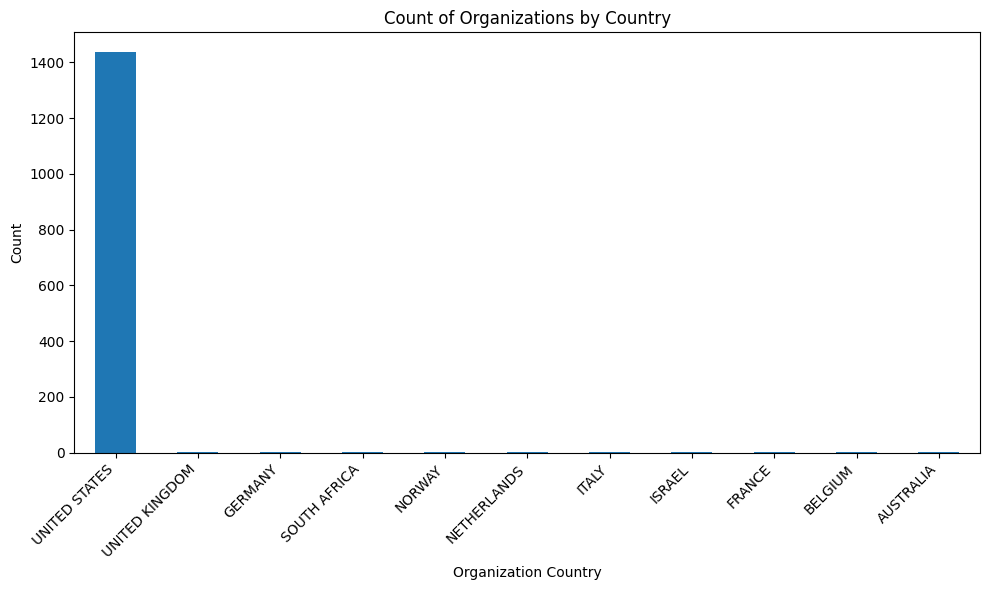

In [61]:
# Count the occurrences of each country in the 'Organization Country' column
country_counts = df2['Organization Country'].value_counts()

# Create a bar graph for 'country_counts'
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Organization Country')
plt.ylabel('Count')
plt.title('Count of Organizations by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

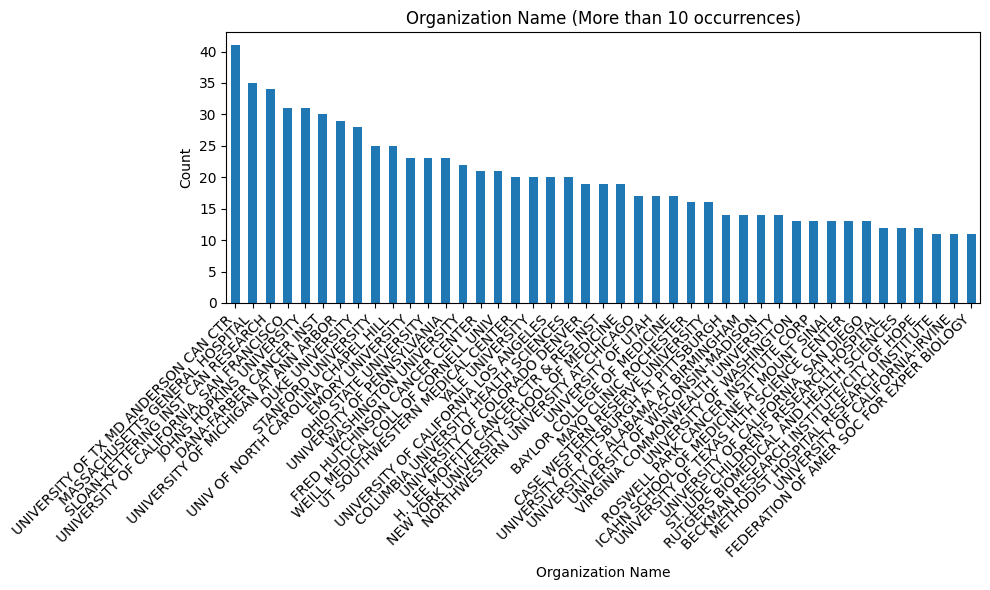

In [62]:
# Count the occurrences of each country in the 'Organization Name' column
country_counts = df2['Organization Name'].value_counts()

# Filter to keep only countries with more than 10 occurrences
country_counts_filtered = country_counts[country_counts > 10]

# Create a bar graph for the filtered data
plt.figure(figsize=(10, 6))
country_counts_filtered.plot(kind='bar')
plt.xlabel('Organization Name')
plt.ylabel('Count')
plt.title('Organization Name (More than 10 occurrences)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

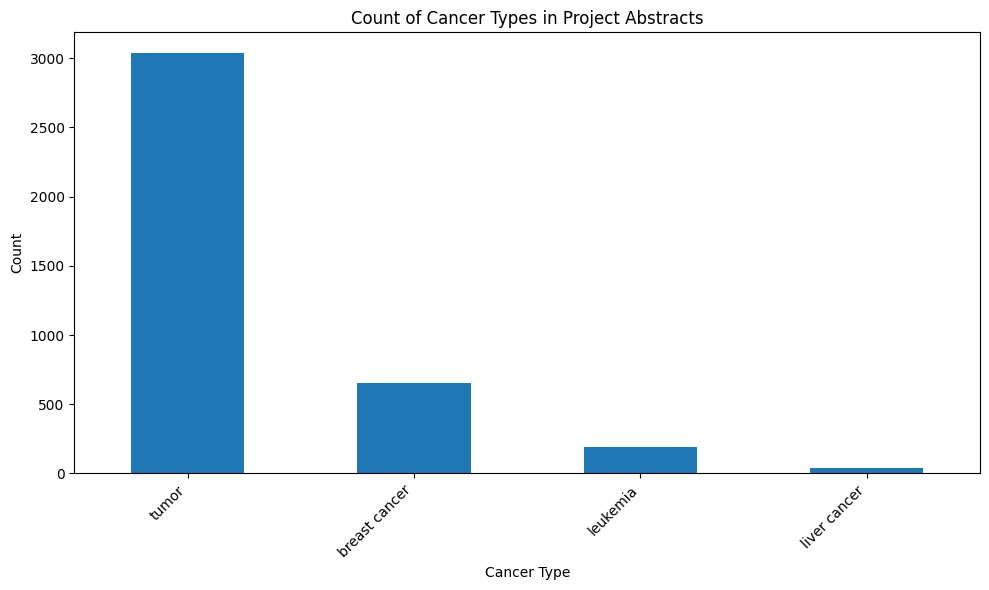

In [63]:
# Extract and count the occurrences of specific cancer types in the 'Project Abstract' column while convert text to lowercase and count the frequency of each cancer type.
cancer_counts = df2['Project Abstract'].str.lower().str.findall(r'\b(breast cancer|leukemia|liver cancer|tumor)\b').explode().value_counts()

# Create a bar graph to visualize the frequency of different cancer types.
plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Count of Cancer Types in Project Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


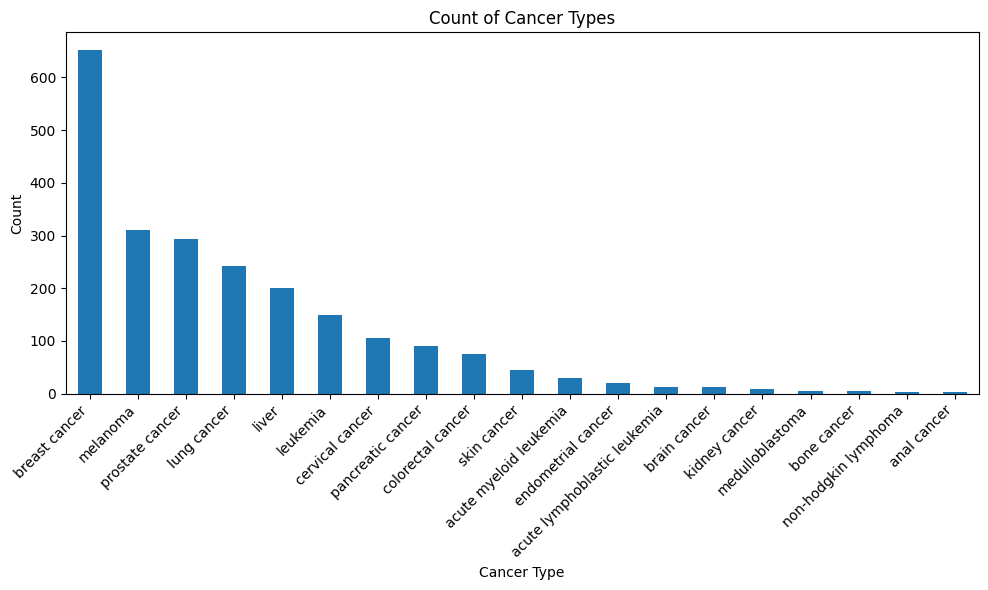

In [64]:
# List of specific cancer types to search for in the 'Project Abstract' column
cancer_types = [
    "acute lymphoblastic leukemia",
    "acute myeloid leukemia",
    "anal cancer",
    "adrenocortical carcinoma",
    "breast cancer",
    "brain cancer",
    "bone cancer",
    "bile duct cancer",
    "colon and rectal cancer",
    "colorectal cancer",
    "cervical cancer",
    "endometrial cancer",
    "kidney cancer",
    "leukemia",
    "liver",
    "lung cancer",
    "melanoma",
    "medulloblastoma",
    "non-hodgkin lymphoma",
    "pancreatic cancer",
    "prostate cancer",
    "skin cancer"
]

# Create a regular expression pattern to search for these cancer types
pattern = r'\b(' + '|'.join(cancer_types) + r')\b'

# Find the occurrences of each cancer type in the 'Project Abstract' column
cancer_counts = df2['Project Abstract'].str.lower().str.findall(pattern).explode().value_counts()

# Create a bar graph to visualize the count of each cancer type
plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Count of Cancer Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

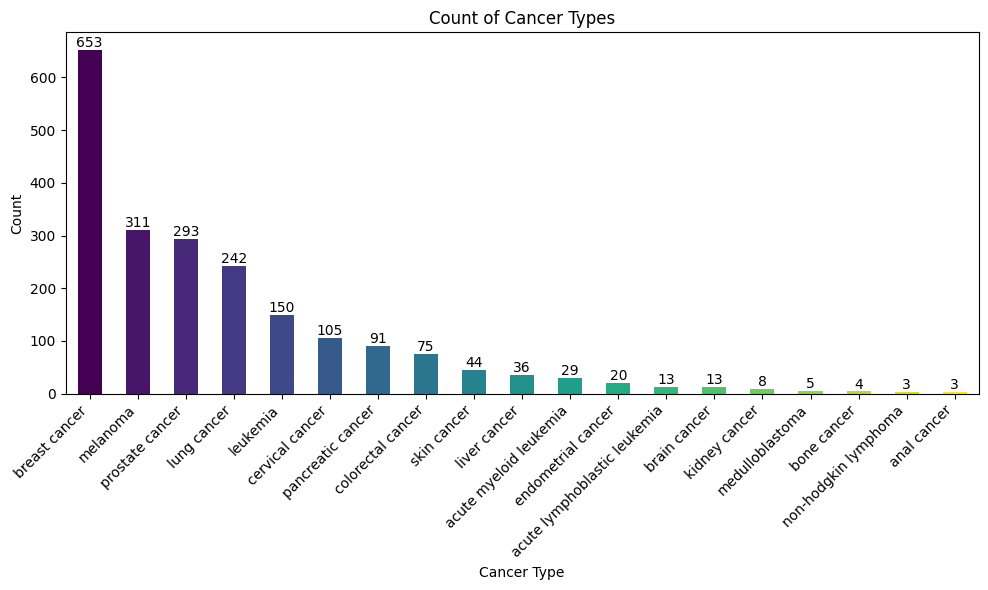

In [65]:
# List of specific cancer types to search for in the 'Project Abstract' column
cancer_types = [
    "acute lymphoblastic leukemia",
    "acute myeloid leukemia",
    "anal cancer",
    "adrenocortical carcinoma",
    "breast cancer",
    "brain cancer",
    "bone cancer",
    "bile duct cancer",
    "colon and rectal cancer",
    "colorectal cancer",
    "cervical cancer",
    "endometrial cancer",
    "kidney cancer",
    "leukemia",
    "liver cancer",
    "lung cancer",
    "melanoma",
    "medulloblastoma",
    "non-hodgkin lymphoma",
    "pancreatic cancer",
    "prostate cancer",
    "skin cancer"
]

# Create a regular expression pattern to search for these cancer types
pattern = r'\b(' + '|'.join(cancer_types) + r')\b'

# Find the occurrences of each cancer type in the 'Project Abstract' column
cancer_counts = df2['Project Abstract'].str.lower().str.findall(pattern).explode().value_counts()

# Create the bar graph with counts and color gradient
plt.figure(figsize=(10, 6))
ax = cancer_counts.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, len(cancer_counts))))
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.title('Count of Cancer Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


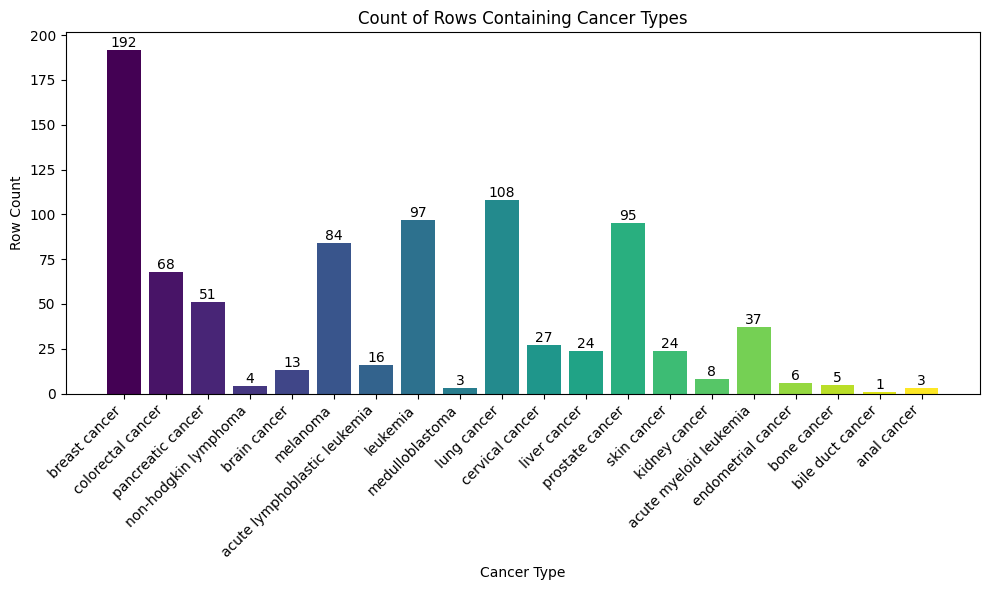

In [66]:
# List of specific cancer types to search for in the 'Project Abstract' column
cancer_types = [
    "acute lymphoblastic leukemia",
    "acute myeloid leukemia",
    "anal cancer",
    "adrenocortical carcinoma",
    "breast cancer",
    "brain cancer",
    "bone cancer",
    "bile duct cancer",
    "colon and rectal cancer",
    "colorectal cancer",
    "cervical cancer",
    "endometrial cancer",
    "kidney cancer",
    "leukemia",
    "liver cancer",
    "lung cancer",
    "melanoma",
    "medulloblastoma",
    "non-hodgkin lymphoma",
    "pancreatic cancer",
    "prostate cancer",
    "skin cancer"
]

# Define function to count rows containing each word
def count_rows_with_word(df, column, words):
    """
    Counts the number of rows in a DataFrame's column that contain each word.

    Args:
        df: The DataFrame to analyze.
        column: The column to search in.
        words: A list of words to search for.

    Returns:
        A dictionary mapping each word to its row count.
    """
    word_counts = defaultdict(int)
    for _, row in df.iterrows():
        text = str(row[column]).lower()
        for word in words:
            if word.lower() in text:
                word_counts[word] += 1
    return word_counts

# Count rows in 'Project Abstract' column that contain each cancer type
word_counts = count_rows_with_word(df2, 'Project Abstract', cancer_types)

# Create the bar graph with counts and color gradient
plt.figure(figsize=(10, 6))
ax = plt.bar(word_counts.keys(), word_counts.values(), color=plt.cm.viridis(np.linspace(0, 1, len(word_counts))))
plt.xlabel('Cancer Type')
plt.ylabel('Row Count')
plt.title('Count of Rows Containing Cancer Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add counts on top of each bar
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height, height, ha='center', va='bottom')


plt.show()


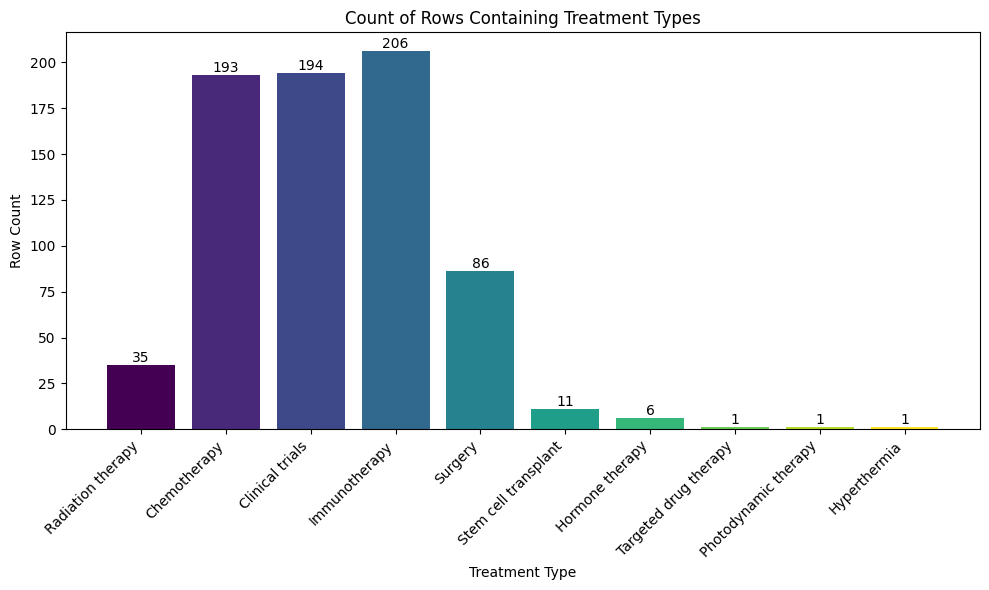

In [67]:
# List of specific treatment types to search for in the 'Project Abstract' column
treatment_types = [
    "Biomarker testing",
    "Chemotherapy",
    "Hormone therapy",
    "Hyperthermia",
    "Immunotherapy",
    "Photodynamic therapy",
    "Radiation therapy",
    "Stem cell transplant",
    "Surgery",
    "Targeted drug therapy",
    "Clinical trials"
]

# Count rows in 'Project Abstract' column that contain each treatment type
word_counts = count_rows_with_word(df2, 'Project Abstract', treatment_types)

# Create the bar graph with counts and color gradient
plt.figure(figsize=(10, 6))
ax = plt.bar(word_counts.keys(), word_counts.values(), color=plt.cm.viridis(np.linspace(0, 1, len(word_counts))))
plt.xlabel('Treatment Type')
plt.ylabel('Row Count')
plt.title('Count of Rows Containing Treatment Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add counts on top of each bar
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height, height, ha='center', va='bottom')

plt.show()


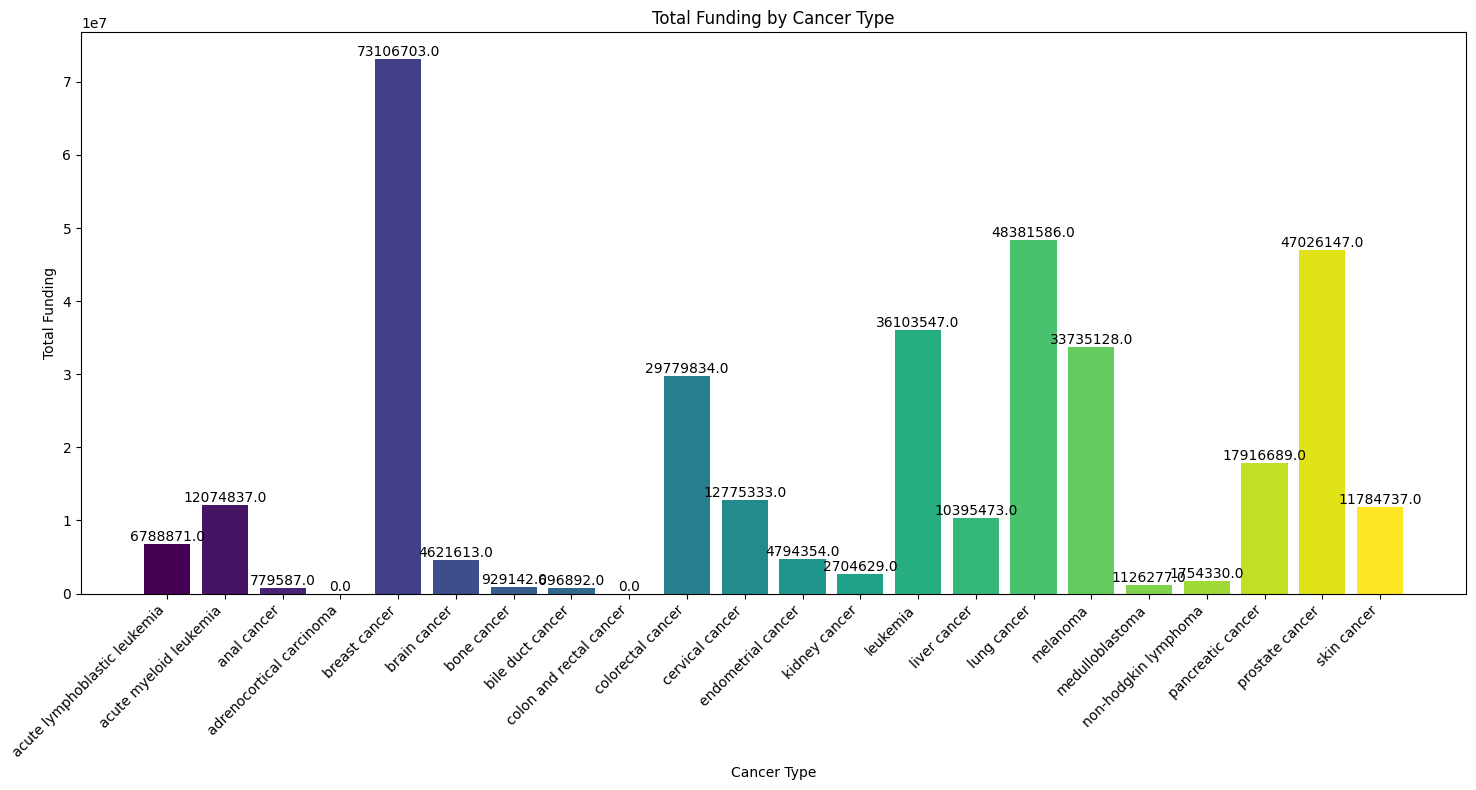

In [68]:
# Create a dictionary to store the total funding for each cancer type
cancer_funding = {}
for cancer_type in cancer_types:
  cancer_funding[cancer_type] = 0.0  # Initialize with 0.0

# Convert 'Total Cost' to numeric type
df2['Total Cost'] = pd.to_numeric(df2['Total Cost'])

# Iterate through the 'Project Abstract' column and find mentions of each cancer type
for index, row in df2.iterrows():
  abstract = str(row['Project Abstract']).lower()
  for cancer_type in cancer_types:
    if cancer_type in abstract:
      cancer_funding[cancer_type] += row['Total Cost']

# Create the bar graph with counts and color gradient
plt.figure(figsize=(15, 8))
plt.bar(cancer_funding.keys(), cancer_funding.values(), color=plt.cm.viridis(np.linspace(0, 1, len(cancer_funding))))
plt.xlabel('Cancer Type')
plt.ylabel('Total Funding')
plt.title('Total Funding by Cancer Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add counts on top of each bar
for i, v in enumerate(cancer_funding.values()):
  plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()


### Formal Analysis

In [69]:
# Load the CSV file named 'Final_dataframe.csv' into a new DataFrame called 'df'.
df = pd.read_csv('/content/Final_dataframe.csv')

# Display the first 5 rows of the DataFrame to get an initial view of the data.
df.head(20)

,Project Title,Contact PI Person ID,Contact PI / Project Leader,Project Abstract,Public Health Relevance,Department,Organization ID (IPF),Organization Name,Organization City,Organization State,Organization Type,Organization Country,Total Cost,Total Cost (Sub Projects),Funding IC(s),Direct Cost IC,InDirect Cost IC,Total Cost IC
0,eDyNAmiC (extrachromosomal DNA in Cancer) - Un...,9811494,"VENTURA, ANDREA",Abstract: eDyNAmiC (extrachromosomal DNA in Ca...,NaN,Unavailable,5079202,SLOAN-KETTERING INST CAN RESEARCH,NEW YORK,NY,Research Institutes,UNITED STATES,166232,,NCI,94450,71782,166232
1,SCH: Individualized learning and prediction fo...,9839722,"QU, ANNIE",Recent technological advances in mobile health...,The proposed project will have potentially pro...,BIOSTATISTICS & OTHER MATH SCI,577504,UNIVERSITY OF CALIFORNIA-IRVINE,IRVINE,CA,COMPUTER CENTER,UNITED STATES,299988,,NCI,132459,67529,199988
2,SCH: Robust Multimodal Longitudinal AI for Enh...,10641231,"NABAVI, SHEIDA",The overarching objective of this project is t...,NaN,ENGINEERING (ALL TYPES),1506602,UNIVERSITY OF CONNECTICUT STORRS,STORRS-MANSFIELD,CT,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,310317,,NCI,180763,79554,260317
3,SCH: Synchronous Dyadic Physiological Monitori...,78467322,"ROBERTS, DAVID L",Animal-Assisted Interventions (AAIs) are goal-...,NaN,BIOSTATISTICS & OTHER MATH SCI,578204,NORTH CAROLINA STATE UNIVERSITY RALEIGH,RALEIGH,NC,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,299950,,NCI,111281,38669,149950
4,SCH: Topological Methods for Breast Tissue Qua...,14901305,"CHEN, CHAO",To better understand breast cancer and its res...,NaN,ENGINEERING (ALL TYPES),5992612,STATE UNIVERSITY NEW YORK STONY BROOK,STONY BROOK,NY,BIOMED ENGR/COL ENGR/ENGR STA,UNITED STATES,300000,,NCI,97207,52793,150000
5,SCH: Counterfactual Explanations for AI-Assist...,79641507,"WANG, HAO",Accurate diagnosis of cancer hinges on histopa...,NaN,BIOSTATISTICS & OTHER MATH SCI,1196203,"RUTGERS, THE STATE UNIV OF N.J.",PISCATAWAY,NJ,SCHOOLS OF ARTS AND SCIENCES,UNITED STATES,266614,,NCI,171834,94780,266614
6,PROTECT - Develop therapeutics to target oncog...,1923959,"CHESLER, LOUIS",Title: PROTECT Harnessing PROTEin degradation...,NaN,Unavailable,3527411,THE INSTITUTE OF CANCER RESEARCH: ROYAL CANCER...,LONDON,,Unavailable,UNITED KINGDOM,128664,,NCI,119133,9531,128664
7,MGH- PROSPECT: Pathways Risk factors and mOlec...,7609343,"CHAN, ANDREW T",ABSTRACTOur vision is to unravel and ultimatel...,NaN,Unavailable,4907701,MASSACHUSETTS GENERAL HOSPITAL,BOSTON,MA,Independent Hospitals,UNITED STATES,576657,,NCI,376682,199975,576657
8,PROTECT - Harnessing PROTEin degradation for A...,79658853,"VON DELFT, FRANK",eRA ASSIST for NCI PROTECTTitle: PROTECT Har...,NaN,Unavailable,6346001,UNIVERSITY OF OXFORD,OXFORD,,Unavailable,UNITED KINGDOM,101568,,NCI,94044,7524,101568
9,SAMBAI: Societal Ancestry and Molecular Biolog...,9758594,"ELEMENTO, OLIVIER",SAMBAI: Societal Ancestry Molecular and Biolog...,NaN,PHYSIOLOGY,1514803,WEILL MEDICAL COLL OF CORNELL UNIV,NEW YORK,NY,SCHOOLS OF MEDICINE,UNITED STATES,214133,,NCI,126332,87801,214133


#### TF-IDF Method

In [70]:
# Define a set named 'total' to store unique cancer types.
total = {'acute lymphoblastic leukemia',
    'acute myeloid leukemia',
    'anal cancer',
    'adrenocortical carcinoma',
    'breast cancer',
    'brain cancer',
    'bone cancer',
    'bile duct cancer',
    'colon and rectal cancer',
    'colorectal cancer',
    'cervical cancer',
    'endometrial cancer',
    'kidney cancer',
    'leukemia',
    'liver cancer',
    'lung cancer',
    'melanoma',
    'medulloblastoma',
    'non-hodgkin lymphoma',
    'pancreatic cancer',
    'prostate cancer',
    'skin cancer'}

# Print the set of cancer types to display all unique values.
print(total)

{'prostate cancer', 'melanoma', 'skin cancer', 'adrenocortical carcinoma', 'colon and rectal cancer', 'breast cancer', 'liver cancer', 'endometrial cancer', 'brain cancer', 'cervical cancer', 'lung cancer', 'acute myeloid leukemia', 'non-hodgkin lymphoma', 'acute lymphoblastic leukemia', 'kidney cancer', 'bile duct cancer', 'colorectal cancer', 'bone cancer', 'anal cancer', 'medulloblastoma', 'leukemia', 'pancreatic cancer'}


In [71]:
# Convert the set of cancer types to a list of strings for compatibility with the TF-IDF vectorizer.
cancer_types = list(total)

# Create a TF-IDF vectorizer to transform cancer type names into TF-IDF vectors.
vectorizer = TfidfVectorizer()

# Fit the TF-IDF model and transform the list of cancer types into TF-IDF feature vectors.
tfidf_matrix = vectorizer.fit_transform(cancer_types)

# Get the feature names (words) extracted by the vectorizer.
feature_names = vectorizer.get_feature_names_out()

# Print the sparse TF-IDF matrix representation.
print(tfidf_matrix)

# Print the feature names that correspond to the columns in the TF-IDF matrix.
print(feature_names)

# Convert the TF-IDF sparse matrix to a dense matrix (array) for easier visualization.
tfidf_array = tfidf_matrix.toarray()

# Print the dense matrix to view the TF-IDF scores.
print(tfidf_array)

  (0, 27)	0.9297779755535899
  (0, 8)	0.3681207901972775
  (1, 23)	1.0
  (2, 8)	0.3681207901972775
  (2, 29)	0.9297779755535899
  (3, 1)	0.7071067811865476
  (3, 9)	0.7071067811865476
  (4, 8)	0.22283870875374182
  (4, 11)	0.5628329858495517
  (4, 3)	0.5628329858495517
  (4, 28)	0.5628329858495517
  (5, 8)	0.3681207901972775
  (5, 7)	0.9297779755535899
  (6, 8)	0.3681207901972775
  (6, 18)	0.9297779755535899
  (7, 8)	0.3681207901972775
  (7, 14)	0.9297779755535899
  (8, 8)	0.3681207901972775
  (8, 6)	0.9297779755535899
  (9, 8)	0.3681207901972775
  (9, 10)	0.9297779755535899
  (10, 8)	0.3681207901972775
  (10, 19)	0.9297779755535899
  (11, 0)	0.5675621228330577
  (11, 24)	0.6433393980135109
  (11, 17)	0.5137972904646797
  (12, 25)	0.5773502691896258
  (12, 15)	0.5773502691896258
  (12, 21)	0.5773502691896258
  (13, 0)	0.5675621228330577
  (13, 17)	0.5137972904646797
  (13, 20)	0.6433393980135109
  (14, 8)	0.3681207901972775
  (14, 16)	0.9297779755535899
  (15, 8)	0.26959426914925927
  

In [72]:
# Create a dictionary to store the count of each cancer type initialized to 0 and will have keys as cancer types and values as their respective counts.
wordDictA = dict.fromkeys(total, 0)

# Iterate over each project abstract in 'df_new'.
for abstract in df['Project Abstract']:
    # Check for the presence of each cancer type in the current abstract.
    for word in total:
        if word in abstract:  # If the cancer type is found in the abstract, increment its count.
            wordDictA[word] += 1


In [73]:
# Convert 'wordDictA' (dictionary of cancer type counts) to a DataFrame with columns 'word' and 'count'.
pd.DataFrame(list(wordDictA.items()), columns=['word', 'count'])

,word,count
0,prostate cancer,85
1,melanoma,83
2,skin cancer,24
3,adrenocortical carcinoma,0
4,colon and rectal cancer,0
5,breast cancer,190
6,liver cancer,21
7,endometrial cancer,6
8,brain cancer,12
9,cervical cancer,27


In [74]:
def computeTF(wordDict, doc):
    """
    Compute the Term Frequency (TF) for each word in the given document.

    Args:
        wordDict: Dictionary of word counts in the document.
        doc: List of words in the document.

    Returns:
        tfDict: Dictionary with words as keys and their term frequency as values.
    """
    tfDict = {}  # Initialize an empty dictionary to store term frequency values.
    corpusCount = len(doc)  # Total number of words in the document (corpus size).

    # Calculate the term frequency for each word in 'wordDict'.
    for word, count in wordDict.items():
        tfDict[word] = count / float(corpusCount)  # TF = (word count in document) / (total word count in document)

    return tfDict


In [75]:
# Compute the Term Frequency (TF) for the 'wordDictA' word counts using the 'total' set as the document (list of words).
tfFirst = computeTF(wordDictA, total)

In [76]:
# Convert the 'tfFirst' dictionary (containing TF values) into a single-row DataFrame for visualization.
tf = pd.DataFrame([tfFirst])

# Display the DataFrame.
tf

,prostate cancer,melanoma,skin cancer,adrenocortical carcinoma,colon and rectal cancer,breast cancer,liver cancer,endometrial cancer,brain cancer,cervical cancer,...,non-hodgkin lymphoma,acute lymphoblastic leukemia,kidney cancer,bile duct cancer,colorectal cancer,bone cancer,anal cancer,medulloblastoma,leukemia,pancreatic cancer
0,3.863636,3.772727,1.090909,0.0,0.0,8.636364,0.954545,0.272727,0.545455,1.227273,...,0.0,0.590909,0.363636,0.0,2.454545,0.181818,0.136364,0.090909,4.272727,2.045455


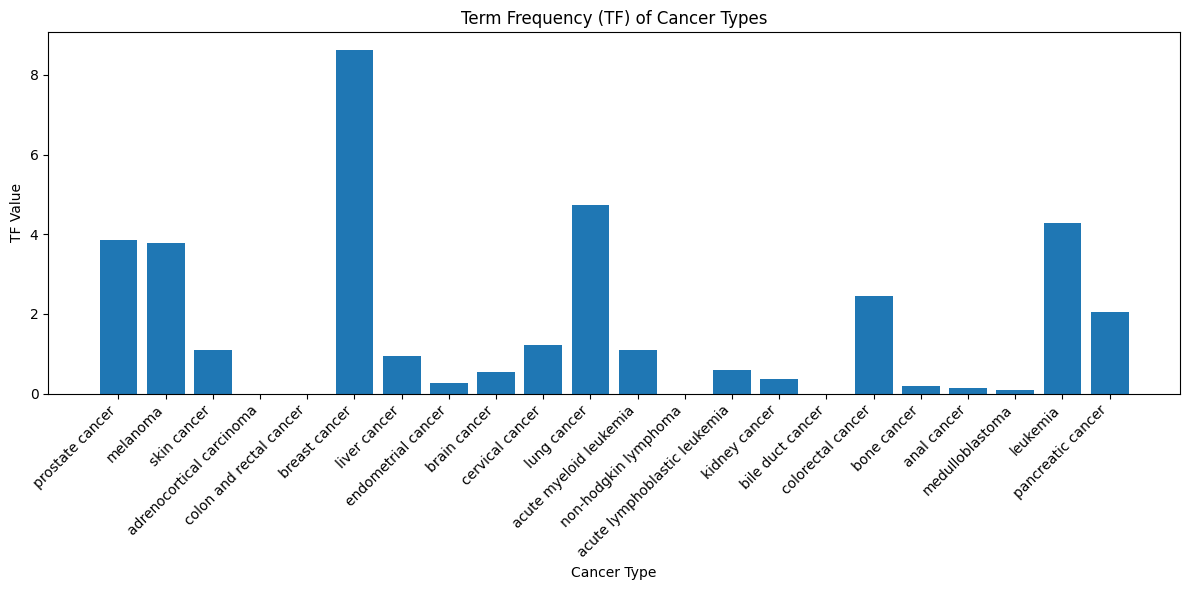

In [77]:
# Visualization of the tf dataframe

# Transpose the DataFrame for better visualization
tf_transposed = tf.transpose()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(tf_transposed.index, tf_transposed.iloc[:, 0])
plt.xlabel('Cancer Type')
plt.ylabel('TF Value')
plt.title('Term Frequency (TF) of Cancer Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### LDA Method for Cancer Types

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Number of abstracts without an assigned cancer type after reassignment: 0


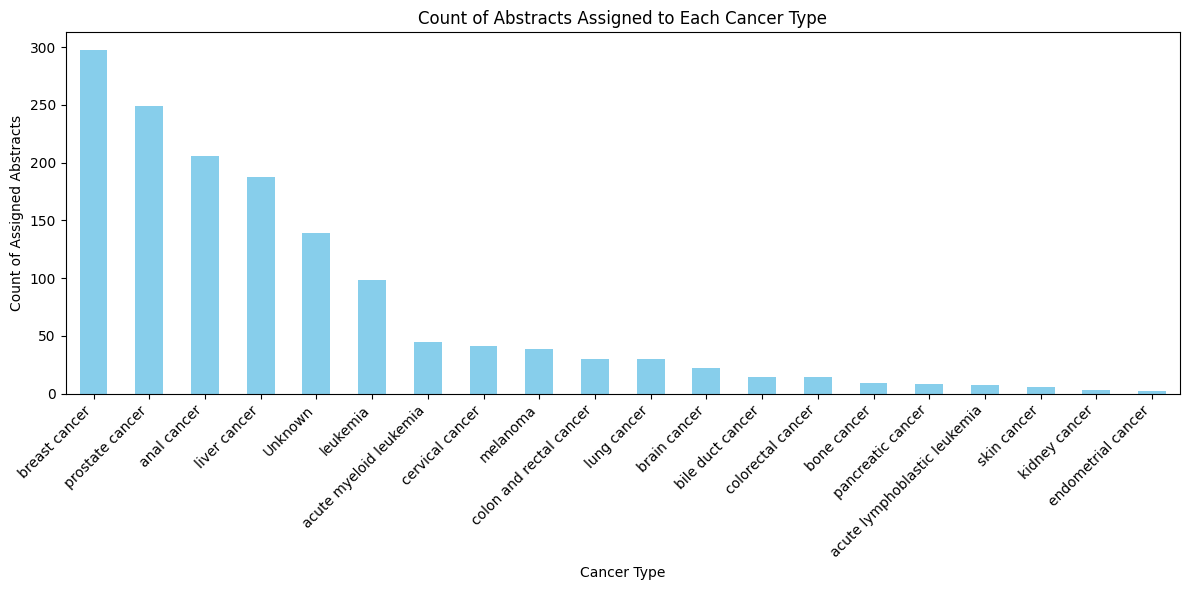

In [78]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Load the data from the FinalDataframe CSV
data = pd.read_csv('/content/Final_dataframe.csv')

# Define cancer types and associated words
cancer_types = [
    "acute lymphoblastic leukemia", "acute myeloid leukemia", "anal cancer",
    "adrenocortical carcinoma", "breast cancer", "brain cancer", "bone cancer",
    "bile duct cancer", "colon and rectal cancer", "colorectal cancer",
    "cervical cancer", "endometrial cancer", "kidney cancer", "leukemia",
    "liver cancer", "lung cancer", "melanoma", "medulloblastoma",
    "non-hodgkin lymphoma", "pancreatic cancer", "prostate cancer",
    "skin cancer"
]

associated_cancer_words = {
    "acute lymphoblastic leukemia": "lymphoblastic",
    "acute myeloid leukemia": "myeloid",
    "anal cancer": "anal",
    "adrenocortical carcinoma": "adrenocortical",
    "breast cancer": "breast",
    "brain cancer": "brain",
    "bone cancer": "bone",
    "bile duct cancer": "bile",
    "colon and rectal cancer": "colon",
    "colorectal cancer": "colorectal",
    "cervical cancer": "cervical",
    "endometrial cancer": "endometrial",
    "kidney cancer": "kidney",
    "leukemia": "leukemia",
    "liver cancer": "liver",
    "lung cancer": "lung",
    "melanoma": "melanoma",
    "medulloblastoma": "medulloblastoma",
    "non-hodgkin lymphoma": "non-hodgkin",
    "pancreatic cancer": "pancreatic",
    "prostate cancer": "prostate",
    "skin cancer": "skin"
}

# Step 1: Text Preprocessing
def preprocess_text(text):
    """Preprocess text by removing punctuation, tokenizing, removing stopwords, and lemmatizing."""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Project Abstract' column for all abstracts
data['cleaned_abstract'] = data['Project Abstract'].apply(lambda x: preprocess_text(str(x)))

# Step 2: Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
doc_term_matrix = vectorizer.fit_transform(data['cleaned_abstract'])

# Step 3: Fit the LDA Model for Cancer Types
lda_model = LatentDirichletAllocation(n_components=len(cancer_types), random_state=42)
lda_model.fit(doc_term_matrix)

# Step 4: Map LDA topics to cancer types using keywords
def get_topic_keywords(lda_model, vectorizer, n_top_words=10):
    """Extract top words for each topic from LDA model."""
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        topic_keywords[topic_idx] = top_words
    return topic_keywords

# Get the top words for each topic
topic_keywords = get_topic_keywords(lda_model, vectorizer)

# Step 5: Create a mapping of LDA topics to cancer types based on keywords
topic_to_cancer_mapping = {}
for topic_idx, keywords in topic_keywords.items():
    for cancer_type, keyword in associated_cancer_words.items():
        if any(keyword in word for word in keywords):
            topic_to_cancer_mapping[topic_idx] = cancer_type
            break

# Step 6: Assign topics to abstracts based on LDA topic distribution and the mapping
doc_topic_distributions = lda_model.transform(doc_term_matrix)

# Initialize a list to store assigned topics
assigned_topics = []

for idx, topic_distribution in enumerate(doc_topic_distributions):
    max_topic = topic_distribution.argmax()  # Get the index of the topic with the highest probability
    assigned_cancer = topic_to_cancer_mapping.get(max_topic, 'Unknown')  # Map to the cancer type
    assigned_topics.append(assigned_cancer)

# Add the assigned topics back to the DataFrame
data['Assigned Topic'] = assigned_topics

# Step 7: Analyze "Unknown" abstracts and try to reassign them using manual keyword matching
for index, row in data[data['Assigned Topic'] == 'Unknown'].iterrows():
    abstract = row['cleaned_abstract']
    for cancer_type, keyword in associated_cancer_words.items():
        if keyword in abstract:
            data.at[index, 'Assigned Topic'] = cancer_type
            break

# Step 8: Check if all abstracts have been assigned a cancer type
unassigned_count = data['Assigned Topic'].isnull().sum()
print(f"\nNumber of abstracts without an assigned cancer type after reassignment: {unassigned_count}")

# Step 9: Visualize the distribution of assigned cancer types
topic_counts = data['Assigned Topic'].value_counts()

plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Abstracts Assigned to Each Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Count of Assigned Abstracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [79]:
# ANOVA test based on the Assigned topics in the LDA by cancer type

from scipy.stats import f_oneway

# Group funding amounts by the assigned topics
funding_by_topic = data.groupby('Assigned Topic')['Total Cost'].apply(list)

# Filter out any empty groups
filtered_groups = [group for group in funding_by_topic.values if len(group) > 0]

# Perform one-way ANOVA if there are multiple groups with data
if len(filtered_groups) > 1:
  anova_result = f_oneway(*filtered_groups)
  print("ANOVA test result:", anova_result)

  # Interpret the results
  alpha = 0.05  # Set significance level (common value is 0.05)
  if anova_result.pvalue < alpha:
      print("The null hypothesis is rejected.")
      print("There is a statistically significant difference in funding amounts across the different cancer types based on the assigned topics from LDA.")
  else:
      print("The null hypothesis is not rejected.")
      print("There is no statistically significant difference in funding amounts across the different cancer types based on the assigned topics from LDA.")

else:
  print("Not enough groups with data to perform ANOVA.")


ANOVA test result: F_onewayResult(statistic=2.854452509154581, pvalue=3.871282002114227e-05)
The null hypothesis is rejected.
There is a statistically significant difference in funding amounts across the different cancer types based on the assigned topics from LDA.


In [80]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Load the data from the FinalDataframe CSV
data = pd.read_csv('/content/Final_dataframe.csv')

# Define treatment types and associated words
treatment_types = {
    "Biomarker Testing": "biomarker",
    "Chemotherapy": "chemotherapy",
    "Hormone Therapy": "hormone",
    "Hyperthermia": "hyperthermia",
    "Immunotherapy": "immunotherapy",
    "Photodynamic Therapy": "photodynamic",
    "Radiation Therapy": "radiation",
    "Stem Cell Transplant": "stem",
    "Surgery": "surgery",
    "Targeted Drug Therapy": "drug",
    "Clinical Trials": "clinical"
}

# Step 1: Text Preprocessing
def preprocess_text(text):
    """Preprocess text by removing punctuation, tokenizing, removing stopwords, and lemmatizing."""
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the 'Project Abstract' column for all abstracts
data['cleaned_abstract'] = data['Project Abstract'].apply(lambda x: preprocess_text(str(x)))

# Step 2: Check keyword frequency distribution in abstracts
for treatment, keyword in treatment_types.items():
    keyword_count = data['cleaned_abstract'].str.contains(keyword, case=False).sum()
    print(f"{treatment}: {keyword_count} abstracts contain the keyword '{keyword}'")

# Step 3: Vectorization using treatment types as the vocabulary
vectorizer = CountVectorizer(vocabulary=list(treatment_types.values()))
doc_term_matrix = vectorizer.fit_transform(data['cleaned_abstract'])

# Step 4: Fit the LDA Model for Treatment Methodologies
lda_model = LatentDirichletAllocation(n_components=len(treatment_types), random_state=42)
lda_model.fit(doc_term_matrix)

# Step 5: Map LDA topics to treatment types using keywords
def get_topic_keywords(lda_model, vectorizer, n_top_words=10):
    """Extract top words for each topic from LDA model."""
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
        topic_keywords[topic_idx] = top_words
    return topic_keywords

# Get the top words for each topic
topic_keywords = get_topic_keywords(lda_model, vectorizer)

# Step 6: Create a mapping of LDA topics to treatment types based on keywords
topic_to_treatment_mapping = {}
for topic_idx, keywords in topic_keywords.items():
    for treatment, keyword in treatment_types.items():
        if any(keyword in word for word in keywords):
            topic_to_treatment_mapping[topic_idx] = treatment
            break

# Step 7: Assign topics to abstracts based on LDA topic distribution and the mapping
doc_topic_distributions = lda_model.transform(doc_term_matrix)

# Initialize a list of topics
assigned_treatment_topics = []

for idx, topic_distribution in enumerate(doc_topic_distributions):
    max_topic = topic_distribution.argmax()  # Get the index of the topic with the highest probability
    assigned_treatment = topic_to_treatment_mapping.get(max_topic, 'Unknown')  # Map to the treatment type
    assigned_treatment_topics.append(assigned_treatment)

# Add the assigned topics back to the DataFrame
data['Assigned Treatment'] = assigned_treatment_topics

# Step 8: Analyze "Unknown" abstracts and try to reassign them using manual keyword matching
for index, row in data[data['Assigned Treatment'] == 'Unknown'].iterrows():
    abstract = row['cleaned_abstract']
    for treatment, keyword in treatment_types.items():
        if keyword in abstract:
            data.at[index, 'Assigned Treatment'] = treatment
            break


Biomarker Testing: 197 abstracts contain the keyword 'biomarker'
Chemotherapy: 205 abstracts contain the keyword 'chemotherapy'
Hormone Therapy: 24 abstracts contain the keyword 'hormone'
Hyperthermia: 1 abstracts contain the keyword 'hyperthermia'
Immunotherapy: 238 abstracts contain the keyword 'immunotherapy'
Photodynamic Therapy: 2 abstracts contain the keyword 'photodynamic'
Radiation Therapy: 125 abstracts contain the keyword 'radiation'
Stem Cell Transplant: 556 abstracts contain the keyword 'stem'
Surgery: 92 abstracts contain the keyword 'surgery'
Targeted Drug Therapy: 373 abstracts contain the keyword 'drug'
Clinical Trials: 910 abstracts contain the keyword 'clinical'


In [81]:
# prompt: Write an ANOVA test for treatment methodologies and their funding

# Group funding amounts by the assigned treatment topics
funding_by_treatment = data.groupby('Assigned Treatment')['Total Cost'].apply(list)

# Filter out any empty groups
filtered_groups_treatment = [group for group in funding_by_treatment.values if len(group) > 0]

# Perform one-way ANOVA if there are multiple groups with data
if len(filtered_groups_treatment) > 1:
    anova_result_treatment = f_oneway(*filtered_groups_treatment)
    print("ANOVA test result for Treatment Methodologies:", anova_result_treatment)

    # Interpret the results
    alpha = 0.05  # Set significance level (common value is 0.05)
    if anova_result_treatment.pvalue < alpha:
        print("The null hypothesis is rejected.")
        print("There is a statistically significant difference in funding amounts across the different treatment methodologies based on the assigned topics from LDA.")
    else:
        print("The null hypothesis is not rejected.")
        print("There is no statistically significant difference in funding amounts across the different treatment methodologies based on the assigned topics from LDA.")

else:
    print("Not enough groups with data to perform ANOVA for Treatment Methodologies.")


ANOVA test result for Treatment Methodologies: F_onewayResult(statistic=0.7307218037773908, pvalue=0.3927909273732709)
The null hypothesis is not rejected.
There is no statistically significant difference in funding amounts across the different treatment methodologies based on the assigned topics from LDA.


#### Word Cloud

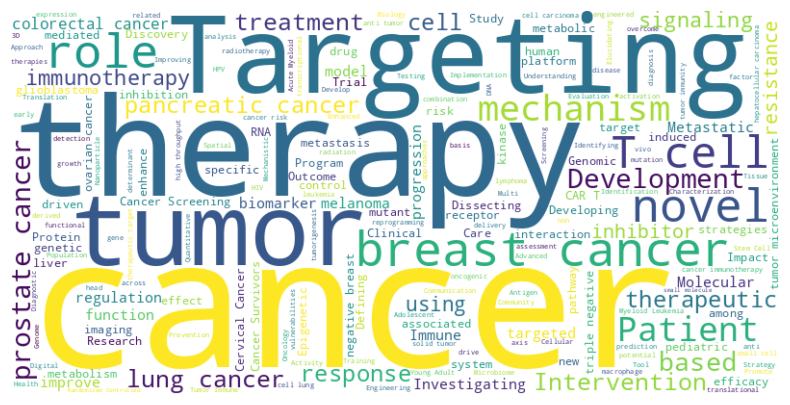

In [82]:
# prompt: make a word cloud with project abstracts

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all project abstracts into a single string
text = " ".join(df2['Project Title'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
